In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

np.random.seed(42)
hd=pd.read_csv('../Data/heart-disease.csv')
hd.head();

X=hd.drop("target",axis=1)
y=hd["target"]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [2]:
y_preds=rfc.predict(X_test)
rfc.score(X_test,y_test), accuracy_score(y_test,y_preds), np.mean(y_test==y_preds)


(0.8524590163934426, 0.8524590163934426, 0.8524590163934426)

In [3]:
print (classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [4]:
rfc.score(X_test,y_test), np.mean(cross_val_score(rfc, X, y, cv=5,scoring=None))

(0.8524590163934426, 0.811639344262295)

In [5]:
y_prob=rfc.predict_proba(X_test)
y_prob_positive=y_prob[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_prob_positive)

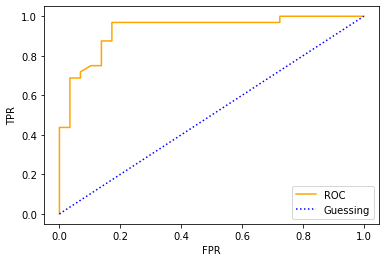

In [6]:
## plot roc_curve 

def plot_roc_curve(fpr,tpr):
    
    plt.plot(fpr,tpr, color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="blue",linestyle="dotted", label="Guessing")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    
plot_roc_curve(fpr,tpr)

In [7]:
roc_auc_score(y_test,y_prob_positive)

0.9304956896551724

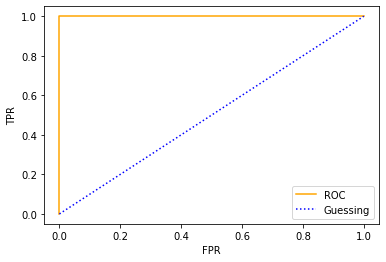

In [8]:
# Perfect AUC curve
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

## Confusion-matrix

In [9]:
y_preds=rfc.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [10]:
pd.crosstab(y_test,y_preds,
           rownames=["Actual labels"],
           colnames=["Predict labels"])

Predict labels,0,1
Actual labels,,
0,24,5
1,4,28


<AxesSubplot:>

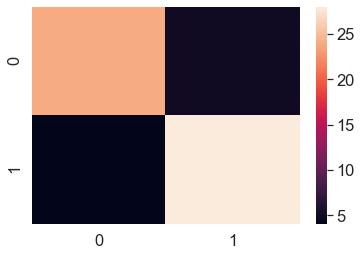

In [11]:
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat)

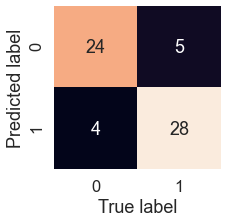

In [12]:
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")


plot_conf_mat(conf_mat)
    

**Classification report**

In [13]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [14]:
disease_true=np.zeros(10000)
disease_true[0]=1

disease_preds=np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

E:\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression model evaluation metrics

1. R^2 -Coefficient of determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)

**R^2**
* Compares your models predictions to the mean of the target.
* values can range from -ve infinity (a very ppot model) to 1. For example, if all your model does is the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's value would be 1.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

np.random.seed(42)

boston=load_boston()

boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=boston["target"]

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train);

model.score(X_test,y_test)

0.8654448653350507

In [16]:
from sklearn.metrics import r2_score
# Fill an array with y_test mean

y_test_mean=np.full(len(y_test),y_test.mean())
y_test.mean()

21.488235294117644

In [17]:
 r2_score(y_test,y_test_mean)

0.0

In [18]:
r2_score(y_test,y_test)

1.0

In [19]:
y_preds=model.predict(X_test)

**MAE**

In [20]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [21]:
df=pd.DataFrame(data={"Actual values":y_test,
                      "Predicted values":y_preds})
df["Differences"]=df["Actual values"]-df["Predicted values"]
df

,Actual values,Predicted values,Differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


In [22]:
mean_absolute_error(y_test,y_preds), sum(abs(df["Differences"]))/len(df)

(2.136382352941176, 2.136382352941176)

### MSE

In [23]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [24]:
mse, np.square(df["Differences"]).mean()

(9.867437068627442, 9.867437068627442)

# Classification

* Accuracy
* Precision
* Recall
* F1 score

# Regression

* R^2
* MAE
* MSE

In [25]:
# Classification
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X=hd.drop("target",axis=1)
y=hd["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestClassifier()

model.fit(X_train,y_train);
y_preds=model.predict(X_test)

model.score(X_test,y_test), accuracy_score(y_test,y_preds), precision_score(y_test,y_preds), recall_score(y_test,y_preds),f1_score(y_test,y_preds)

(0.7704918032786885,
 0.7704918032786885,
 0.7352941176470589,
 0.8333333333333334,
 0.78125)

In [26]:
# Regression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X=hd.drop("target",axis=1)
y=hd["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train);
y_preds=model.predict(X_test)

r2_score(y_test,y_preds), mean_absolute_error(y_test,y_preds), mean_squared_error(y_test,y_preds)

(0.42792578828828853, 0.2434426229508197, 0.13652295081967208)

## 5. Improving a model

From a data perspective:

   * Could we collect more data? 
   * Could we improve our data?
    
From a model perspectve:

   * IS there a better model we could use?
   * Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters - model find these patterns in data
* Hyperparameter - settings on a model you can adjust to improve its ability to find patterns

Three ways to adjust hyperparameters:
   1. By hand
   2. Randomly - RandomSearchCV
   3. Exhaustively - GridSearchCV
    

In [27]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training,validation and test

We're going to try and adjust:

* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'
* 'n_estimators'
 

In [28]:
def evaluate_preds(y_true,y_preds):
    
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metrics_dict={"accuracy":round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)
                 }
    print (f"Accu: {accuracy * 100:.2f}%")
    print (f"Precision: {precision:.2f}")
    print (f"Recall: {recall:.2f}")
    print (f"F1 score: {f1:.2f}")
    return metrics_dict

In [29]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle datasets
hds=hd.sample(frac=1)

X=hds.drop("target",axis=1)
y=hds["target"]

# train, validation and test split

train_split=round(0.7 * len(hds))
valid_split=round(train_split+0.15*len(hds))

X_train,y_train=X[:train_split], y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

#len(X_train), len(X_valid), len(X_test)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

#Make baseline prediction
y_preds=clf.predict(X_valid)

#Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Accu: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [30]:
np.random.seed(42)

#Create a 2nd classifier with d/t hyperparameters
clf_2=RandomForestClassifier(n_estimators=1)
clf_2.fit(X_train,y_train)
y_preds_2=clf_2.predict(X_valid)

evaluate_preds(y_valid,y_preds_2)


Accu: 71.11%
Precision: 0.75
Recall: 0.72
F1 score: 0.73


{'accuracy': 0.71, 'precision': 0.75, 'recall': 0.72, 'f1': 0.73}

In [31]:
#clf_3=RandomForestClassifier(max_depth=10)

### RandomizedSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Create your own dictionary

grid={"n_estimators":[1, 100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_sample_split":[2,4,6],
      "min_sample_leaf":[1,2,4]
     }
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

X=hds.drop("target",axis=1)
y=hds["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf_3=RandomForestClassifier(n_jobs=1) #-1 all processors

#Setup RandomizedSearchCV

rs_clf=RandomizedSearchCV(estimator=clf_3,
                         param_distributions=grid,
                         n_iter=10,
                         cv=5,
                         verbose=3)
# Fit the RandomizedSearchCV
rs_clf.fit(X_train,y_train);



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1, min_sample_split=2, min_sample_leaf=4, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter min_sample_split for estimator RandomForestClassifier(n_estimators=1). Check the list of available parameters with `estimator.get_params().keys()`.

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_scores_'

### GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
grid2={'n_estimators': [100, 200, 500],
       'max_depth': [None],
       'max_features': ['auto', 'sqrt'],
       'min_sample_split': [6],
       'min_sample_leaf': [1, 2]}

np.random.seed(42)

X=hds.drop("target",axis=1)
y=hds["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf_4=RandomForestClassifier(n_jobs=1) #-1 all processors

#Setup GridSearchCV

gs_clf=GridSearchCV(estimator=clf_4,
                         param_grid=grid2,
                         cv=5,
                         verbose=3)
# Fit the GridSearchCV
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_sample_leaf=1, min_sample_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter min_sample_leaf for estimator RandomForestClassifier(n_jobs=1). Check the list of available parameters with `estimator.get_params().keys()`.

In [43]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [45]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
